In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
def GradDescentArray(Grad_f, x0, nbiter, tau):
    x = x0 
    xlist = [list(x0)]
    for iter in range(nbiter):  
        x = x - tau*Grad_f(x)     
        xlist = xlist + [list(x)]
    return np.array(xlist)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

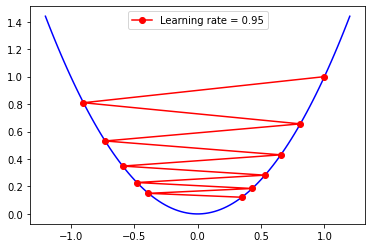

In [ ]:
f = lambda x: x**2
Grad_f = lambda x: 2*x

xs = GradDescentArray(Grad_f, np.array([1]), 10 ,0.95)
xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp), 'blue')
plt.plot(xs, f(xs), 'o-', c='red', label='Learning rate = 0.95')
plt.legend()

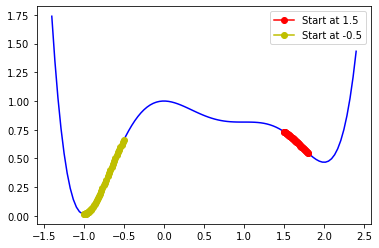

In [ ]:
f = lambda x: 1- x**2 + x**3 + (1/4)*x**4 - (3/5)*x**5 +  (1/6)*x**6
Grad_f = lambda x: -2*x + 3*x**2 + x**3 - 3*x**4 + x**5
xp = np.linspace(-1.4, 2.4, 100)

xs = GradDescentArray(Grad_f, np.array([1.5]), 50 ,0.01)
plt.plot(xp, f(xp), 'blue')
plt.plot(xs, f(xs), 'o-', c='red', label='Start at 1.5')

xs = GradDescentArray(Grad_f, np.array([-0.5]), 50 ,0.01)
plt.plot(xs, f(xs), 'o-', c='y', label='Start at -0.5')

plt.legend()

## Gradient descent

We use this simple (quadratic) example to vizualize Gradient Descent in 2-dimensions:

$$ f(\textbf{x}) = x_1^2 + \eta x_2^2 $$ 
$$ \nabla f(\textbf{x}) = \begin{pmatrix}
x_1  \\
\eta x_2
\end{pmatrix} $$ 
Where $\eta = 2$

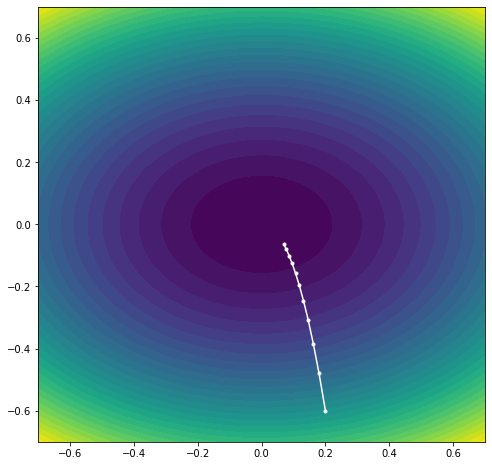

In [ ]:
eta = 2
f = lambda x : (x[0]**2 + eta*x[1]**2) / 2
Grad_f = lambda x : np.array([x[0], eta*x[1]])

t = np.linspace(-.7,.7,101)
[u,v] = np.meshgrid(t,t)
F = (u**2 + eta*v**2) / 2

xarray = GradDescentArray(Grad_f,[0.2,-0.6],10,0.1)
plt.figure(figsize=(8,8))
plt.contourf(t,t,F,35)
plt.plot(xarray[:,0], xarray[:,1], 'w.-')

## Gradient descent With momentum

In [ ]:
def GradDescentArrayMomentum(Grad_f, x0, nbiter, mu, alpha):
    x = x0 
    xlist = [list(x0)]
    v = 0 
    for _ in range(nbiter): 
        v =  mu*v - alpha*Grad_f(x)
        x = x + v   
        xlist = xlist + [list(x)]
    return np.array(xlist)

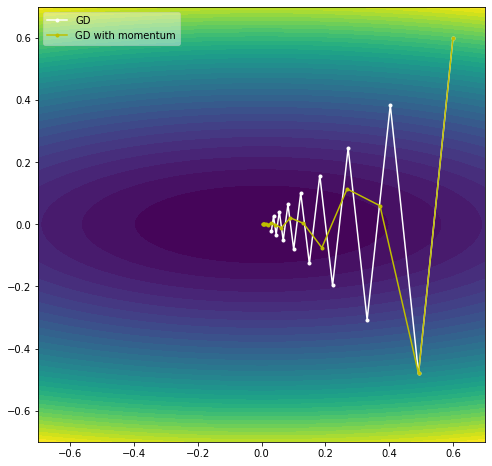

In [ ]:
eta = 10
f = lambda x : (x[0]**2 + eta*x[1]**2) / 2
Grad_f = lambda x : np.array([x[0], eta*x[1]])

t = np.linspace(-.7,.7,101)
[u,v] = np.meshgrid(t,t)
F = (u**2 + eta*v**2) / 2


xarray = GradDescentArray(Grad_f,[0.6,0.6],15,0.18)
xarray_mom = GradDescentArrayMomentum(Grad_f,[0.6,0.6],15,0.3,0.18)

plt.figure(figsize=(8,8))
plt.contourf(t,t,F,35)
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label='GD')
plt.plot(xarray_mom[:,0], xarray_mom[:,1], 'y.-', label='GD with momentum')
plt.legend(facecolor='white', framealpha=0.4)

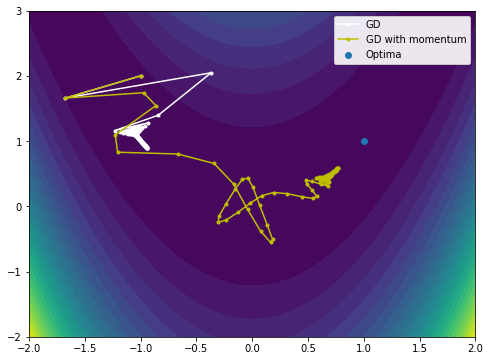

In [ ]:
f = lambda x : (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
Grad_f = lambda x : np.array([ -400*x[0]*x[1]+400*x[0]**3+2*x[0]-2, 200*x[1] - 200*x[0]**2 ])

x = np.linspace(-2,2,250)
y = np.linspace(-2,3,250)

[u,v] = np.meshgrid(x,y)
F = f([u,v])

xarray_mom = GradDescentArrayMomentum(Grad_f,[-1,2],100,0.9,0.0017)
xarray = GradDescentArray(Grad_f,[-1,2],100,0.0017)
plt.figure(figsize=(8,6))
plt.contourf(x,y,F,35)
plt.scatter(1,1, label='Optima')
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label = 'GD')
plt.plot(xarray_mom[:,0], xarray_mom[:,1], 'y.-', label='GD with momentum')
plt.legend(facecolor='white', framealpha=0.9)

## Newton Method

In [ ]:
def NewtonMethod(Grad_f, Hess_f, x0, nbiter, tau=1):
    x = x0 
    xlist = [list(x0)]
    for _ in range(nbiter): 
        x =  x - tau*np.linalg.inv(Hess_f(x)).dot(Grad_f(x))
        xlist = xlist + [list(x)]
    return np.array(xlist)

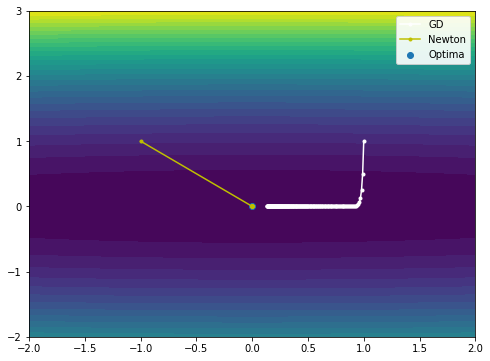

In [ ]:
eta = 50
f = lambda x : (x[0]**2 + eta*x[1]**2) / 2
Grad_f = lambda x : np.array([x[0], eta*x[1]])
Hess_f = lambda x : np.array([[ 1 , 0], [ 0, eta]])

x = np.linspace(-2,2,250)
y = np.linspace(-2,3,250)

[u,v] = np.meshgrid(x,y)
F = f([u,v])

xarray_newton = NewtonMethod(Grad_f, Hess_f, [-1,1], 100)
xarray = GradDescentArray(Grad_f,[1,1],200,0.01)
plt.figure(figsize=(8,6))
plt.contourf(x,y,F,35)
plt.scatter(0,0, label='Optima')
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label = 'GD')
plt.plot(xarray_newton[:,0], xarray_newton[:,1], 'y.-', label='Newton')
plt.legend(facecolor='white', framealpha=0.9)

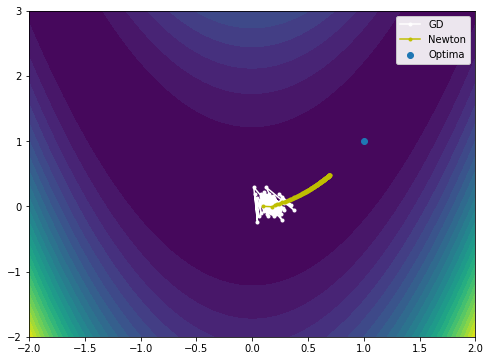

In [ ]:
f = lambda x : (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
Grad_f = lambda x : np.array([ -400*x[0]*x[1]+400*x[0]**3+2*x[0]-2, 200*x[1] - 200*x[0]**2 ])
Hess_f = lambda x : np.array([[ 1200*x[0]**2 -400*x[1] + 2 , -400*x[0]], [ 400*x[0], 200]])


x = np.linspace(-2,2,250)
y = np.linspace(-2,3,250)

[u,v] = np.meshgrid(x,y)
F = f([u,v])

xarray_newton =NewtonMethod(Grad_f, Hess_f, [0.1,0], 200)
xarray = GradDescentArray(Grad_f,[0.1,0],200,0.009)
plt.figure(figsize=(8,6))
plt.contourf(x,y,F,35)
plt.scatter(1,1, label='Optima')
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label = 'GD')
plt.plot(xarray_newton[:,0], xarray_newton[:,1], 'y.-', label='Newton')
plt.legend(facecolor='white', framealpha=0.9)

## Adam

In [ ]:
def Adam(Grad_f, x0, nbiter, tau, beta1=0.9, beta2=0.999, eps=1e-8):
    x = x0 
    xlist = [list(x0)]
    v = 0 
    w = 0 
    for t in range(1,nbiter+1): 
      g = Grad_f(x)
      v = beta1*v + (1-beta1)*g
      w = beta2*w + (1-beta2)*g**2

      v_biascorr = v/(1-(beta1**t))	
      w_biascorr = w/(1-(beta2**t))	

      x =  x - tau*v_biascorr/(np.sqrt(w_biascorr)+eps)
      xlist = xlist + [list(x)]
    return np.array(xlist)

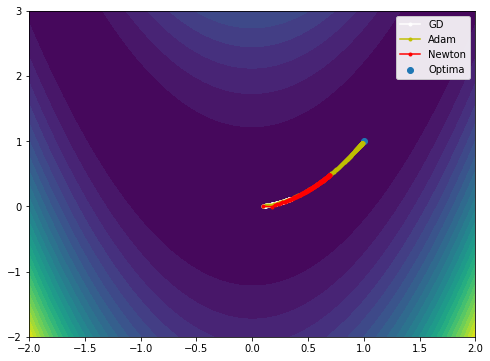

In [ ]:
f = lambda x : (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
Grad_f = lambda x : np.array([ -400*x[0]*x[1]+400*x[0]**3+2*x[0]-2, 200*x[1] - 200*x[0]**2 ])
Hess_f = lambda x : np.array([[ 1200*x[0]**2 -400*x[1] + 2 , -400*x[0]], [ 400*x[0], 200]])


x = np.linspace(-2,2,250)
y = np.linspace(-2,3,250)

[u,v] = np.meshgrid(x,y)
F = f([u,v])

xarray_adam = Adam(Grad_f, [0.1,0], 200, 0.02)
xarray_newton = NewtonMethod(Grad_f, Hess_f, [0.1,0], 200)
xarray = GradDescentArray(Grad_f, [0.1,0], 200, 0.001)
plt.figure(figsize=(8,6))
plt.contourf(x,y,F,35)
plt.scatter(1,1, label='Optima')
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label = 'GD')
plt.plot(xarray_adam[:,0], xarray_adam[:,1], 'y.-', label='Adam')
plt.plot(xarray_newton[:,0], xarray_newton[:,1], 'r.-', label='Newton')
plt.legend(facecolor='white', framealpha=0.9)

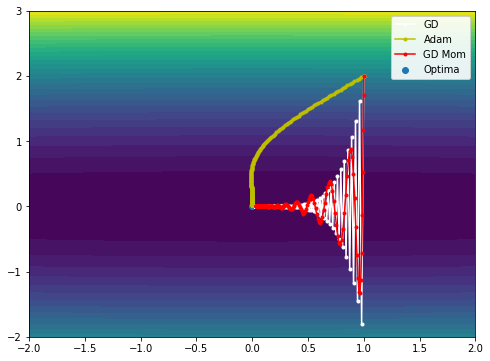

In [ ]:
eta = 100
f = lambda x : (x[0]**2 + eta*x[1]**2) / 2
Grad_f = lambda x : np.array([x[0], eta*x[1]])
Hess_f = lambda x : np.array([[ 1 , 0], [ 0, eta]])

x = np.linspace(-2,2,250)
y = np.linspace(-2,3,250)

[u,v] = np.meshgrid(x,y)
F = f([u,v])

xarray_adam = Adam(Grad_f, [1,2], 200, 0.021)
xarray = GradDescentArray(Grad_f, [1,2], 200, 0.019)
xarray_mom = GradDescentArrayMomentum(Grad_f,[1,2], 200, 0.9, 0.0015)
plt.figure(figsize=(8,6))
plt.contourf(x,y,F,35)
plt.scatter(0,0, label='Optima')
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label = 'GD')
plt.plot(xarray_adam[:,0], xarray_adam[:,1], 'y.-', label='Adam')
plt.plot(xarray_mom[:,0], xarray_mom[:,1], 'r.-', label='GD Mom')
plt.legend(facecolor='white', framealpha=0.9)

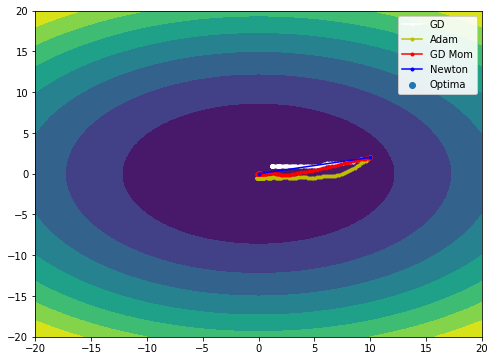

In [ ]:
f = lambda x : x[0]**2 + 2*x[1]**2 - 0.3*np.cos(3*np.pi*x[0]) - 0.4*np.cos(4*np.pi*x[1]) + 0.7

Grad_f = lambda x : np.array([0.9*np.pi*np.sin(3*np.pi*x[0])+2*x[0],
                              1.6*np.pi*np.sin(4*np.pi*x[1])+4*x[1]])

Hess_f = lambda x : np.array([[ 27/10*np.pi*np.pi*np.sin(3*np.pi*x[0])+2 , 0], 
                              [ 0, 32/5*np.pi*np.pi*np.sin(4*np.pi*x[1])+4]])
x = np.linspace(-20,20,250)
y = np.linspace(-20,20,250)

[u,v] = np.meshgrid(x,y)
F = f([u,v])

xarray_adam = Adam(Grad_f, [10,2], 200, 0.2)
xarray = GradDescentArray(Grad_f, [10,2], 200, 0.02)
xarray_mom = GradDescentArrayMomentum(Grad_f,[10,2], 200, 0.9, 0.002)
xarray_newton = NewtonMethod(Grad_f, Hess_f, [10,2], 1)
plt.figure(figsize=(8,6))
plt.contourf(x,y,F,10)
plt.scatter(0,0, label='Optima')
plt.plot(xarray[:,0], xarray[:,1], 'w.-', label = 'GD')
plt.plot(xarray_adam[:,0], xarray_adam[:,1], 'y.-', label='Adam')
plt.plot(xarray_mom[:,0], xarray_mom[:,1], 'r.-', label='GD Mom')
plt.plot(xarray_newton[:,0], xarray_newton[:,1], 'b.-', label='Newton')
plt.legend(facecolor='white', framealpha=0.9)

## Exploding gradients

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

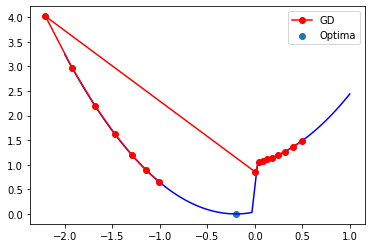

In [ ]:
delta = 0.01
f = lambda x: 0.5*(1+np.tanh(x/delta)) + (x+0.2)**2
Grad_f = lambda x: 0.5/delta*(1-np.tanh(x/delta)**2)+ 2*(x+0.2)
xp = np.linspace(-2, 1, 100)

xs = GradDescentArray(Grad_f, np.array([0.5]), 15 ,0.07)
plt.plot(xp, f(xp), 'blue')
plt.plot(xs, f(xs), 'o-', c='red', label='GD')
plt.scatter(-0.2,0, label='Optima')
plt.legend()